# 2. Building a baseline model
We made a bit of a mistake in the last notebook. We jumped right into a model, albeit a simple one, but we could have made an even simpler model to begin.

# What is the simplest model you can think of for a classification problem?

....



....










....

# Guessing the most common class 
You can't get much simpler than guessing the most common class. Let's see how we would have fared if we made just that guess.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
heart = pd.read_csv('../data/heart.csv')
heart.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
0,63,Male,typical,145,233,1,left ventricular hypertrophy,150,0,2.3,3,0.0,fixed,0
1,67,Male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,2,3.0,normal,1
2,67,Male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,2,2.0,reversable,1
3,37,Male,nonanginal,130,250,0,normal,187,0,3.5,3,0.0,normal,0
4,41,Female,nontypical,130,204,0,left ventricular hypertrophy,172,0,1.4,1,0.0,normal,0


In [3]:
pd.read_csv('../data/heart_data_dictionary.csv')

,column name,description
0,age,age in years
1,sex,Male or Female
2,chest_pain,"typical, asymptomatic, nonanginal, nontypical"
3,rest_bp,resting blood pressure (in mm Hg on admission ...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
6,rest_ecg,"resting electrocardiographic results (0, 1, 2)"
7,max_hr,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,old_peak,ST depression induced by exercise relative to ...


### By guessing all 0's (no heart disease)

In [4]:
heart['disease'].value_counts(normalize=True) 
# 54% percent of time people walk in with no disease

0    0.541254
1    0.458746
Name: disease, dtype: float64

# What if we decided to split the data by sex

In [5]:
f = heart['sex'] == 'Male'
heart.loc[f, 'disease'].mean()

0.5533980582524272

In [6]:
heart.loc[~f, 'disease'].mean()

0.25773195876288657

### Better to use a groupby for this

In [7]:
heart.groupby('sex').agg({'disease': 'mean'})

,disease
sex,
Female,0.257732
Male,0.553398


## Can also plot with Seaborn

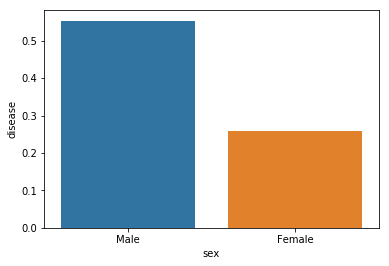

In [8]:
sns.barplot(x='sex', y='disease', data=heart, ci=0)

Looks if we guess no for women but yes for men we would get a higher score.

In [9]:
y = heart['disease']

In [10]:
y_pred = (heart['sex'] == 'Male').astype(int)

In [11]:
(y == y_pred).mean()

0.6138613861386139

## Hmmm... Should we keep splitting our data into different groups and just do manual machine learning?

In [12]:
heart.pivot_table(index='sex', columns='thal', values='disease')

thal,fixed,normal,reversable
sex,,,
Female,1.000000,0.137500,0.866667
Male,0.647059,0.302326,0.745098


For any male with a "normal" `thal`, we should guess 0, but for female and reversible we should guess 1.

### This is fun - let's keep going

In [13]:
df = heart.pivot_table(index = ['sex', 'chest_pain'], columns=['fbs', 'thal'], 
                       values='disease', aggfunc='mean')
df

fbs                     0                          1                  
thal                fixed    normal reversable fixed normal reversable
sex    chest_pain                                                     
Female asymptomatic   NaN  0.307692   1.000000   1.0    1.0       1.00
       nonanginal     NaN  0.000000   0.333333   NaN    0.0        NaN
       nontypical     NaN  0.062500        NaN   NaN    0.5        NaN
       typical        NaN  0.000000        NaN   NaN    0.0        NaN
Male   asymptomatic   0.7  0.560000   0.892857   1.0    1.0       0.90
       nonanginal     NaN  0.217391   0.600000   1.0    0.0       0.25
       nontypical     0.5  0.105263   0.500000   NaN    0.0       0.00
       typical        0.0  0.428571   0.428571   0.0    0.5       0.00

In [14]:
df.style.where(lambda x: x > .5, 'background-color: yellow')

A subset of men have the "normal" `thal` along with fasting blood sugar equal to 0 and chest pain that is nontypical that only have an 11% of heart disease.

# What algorithm am I manually doing?

# Your Turn 
Run a few groupby or pivot tables on different variables to manually find pockets of low and high probability of disease.

In [38]:
# your code here

# Building a Dummy estimator - a baseline model in scikit-learn

Scikit-Learn gives you the ability to build a baseline model with a dummy estimator. Let's do that now.

## Step 1. Import the Estimator

In [16]:
from sklearn.dummy import DummyClassifier

## Step 2. Instantiate the Estimator

In [17]:
dc = DummyClassifier(strategy='most_frequent')# only used for y, not for X

## Step 3. Train the Model

In [18]:
X = heart['max_hr'].values
X = X.reshape(-1, 1)
y = heart['disease'].values

In [19]:
dc.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

# Now we can predict and score

In [20]:
a = np.array([100, 150, 200]).reshape(-1, 1)
a

array([[100],
       [150],
       [200]])

In [21]:
dc.predict(a)

array([0, 0, 0])

In [22]:
dc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
dc.score(X, y)

0.5412541254125413

# What will the `predict_prob` return?

In [24]:
dc.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.